In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
may = pd.read_pickle('../data/may.pkl')
maytrip = pd.read_csv('../data/may_trip.csv')

In [3]:
may.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0
1,2019-05-01 00:01:41.247,36.191252,-86.772945,PoweredXWRWC,35.0,0
2,2019-05-01 00:01:41.247,36.144752,-86.806293,PoweredMEJEH,90.0,0
3,2019-05-01 00:01:41.247,36.162056,-86.774688,Powered1A7TC,88.0,0
4,2019-05-01 00:01:41.247,36.150973,-86.783109,Powered2TYEF,98.0,0


In [4]:
may.tail()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
20292498,2019-05-31 23:59:42,36.1639,-86.7823,Poweredbb60ef04-c719-597f-805f-20978964fd8c,49.0,5
20292499,2019-05-31 23:59:42,36.1606,-86.7768,Powered9f5743ed-7f81-539b-9e37-6503d54445d3,68.0,5
20292500,2019-05-31 23:59:42,36.1606,-86.7769,Powered5744d1db-3bbe-55e5-9a23-a93828ba54fc,53.0,5
20292501,2019-05-31 23:59:42,36.1624,-86.7745,Poweredad1d6d3b-162a-5bec-bffd-cac4ac8dee1c,42.0,5
20292502,2019-05-31 23:59:42,36.1519,-86.7985,Powered8505008e-97c9-5003-8975-2ea6b2634fa0,76.0,5


In [5]:
may.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20283582 entries, 0 to 20292502
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   pubdatetime  datetime64[ns]
 1   latitude     float64       
 2   longitude    float64       
 3   sumdid       object        
 4   chargelevel  float64       
 5   companyname  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 1.1+ GB


#note - the entries and the index numbers are different because we removed bicycles from our dataset.  difference of 8920 entries, there's 8921 bicycles in the csv.

#i wonder how many individual scooters are in this dataset

In [6]:
may['sumdid'].value_counts() 

PoweredIE7H5RIN474PE    8921
PoweredUK65LOU3K5N7G    8748
PoweredIOHG2G3XKATUL    8576
PoweredJCKMQCAL2SSNJ    8521
Powered4NYK5PWADVIAU    8439
                        ... 
PoweredGJYGPDVTFXRH7       1
Powered523737              1
Powered1PKP7               1
PoweredYEBSU               1
Powered3361332             1
Name: sumdid, Length: 8303, dtype: int64

#there's 8303 scooters across 20,283,582 rows of data
that's almost 2443 entries per scooter ... which i can see is not true.
max is 8921, min is 1

i wonder if there's a difference across companies as to how many times each scooter is entered
there's 7 companies - is SHOULD be something like 2,897,654 entries for each business if the distribution is equal

In [7]:
may['companyname'].value_counts()

3    7111655
0    4334006
1    3112581
5    2984630
4    1301001
2     915314
6     524395
Name: companyname, dtype: int64

the data is NOT equal
company 3 has a lot more info than anyone else
companies 1 and 5 are right about where i predicted
companies 0 and 4 are a little above and below
companies 2 and 6 are way underreported compared to the other 5.

In [8]:
may.isnull().sum()

pubdatetime      0
latitude         0
longitude        0
sumdid           0
chargelevel    283
companyname      0
dtype: int64

In [9]:
may.loc[may['sumdid'] == 'PoweredLIRL1']
#company0 = may.loc[may['sumdid'] == 'PoweredLIRL1']
#note: Jeremiah's query to look at how often a scooter is pinged.  this one is every 5 mins

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0
2694,2019-05-01 00:06:41.537,36.136822,-86.799877,PoweredLIRL1,93.0,0
26176,2019-05-01 01:01:43.917,36.136751,-86.799921,PoweredLIRL1,92.0,0
28812,2019-05-01 01:06:44.237,36.136751,-86.799921,PoweredLIRL1,92.0,0
30726,2019-05-01 01:11:44.167,36.136751,-86.799921,PoweredLIRL1,92.0,0
...,...,...,...,...,...,...
20209588,2019-05-31 22:00:15.960,36.191117,-86.781360,PoweredLIRL1,53.0,0
20213207,2019-05-31 22:05:16.080,36.191117,-86.781360,PoweredLIRL1,53.0,0
20216631,2019-05-31 22:10:16.483,36.191096,-86.781369,PoweredLIRL1,53.0,0
20220463,2019-05-31 22:15:16.653,36.191096,-86.781369,PoweredLIRL1,53.0,0


so one of the scooters that had only 1 entry ... 

In [10]:
may.loc[may['sumdid']== 'Powered1PKP7']

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
16270541,2019-05-27 21:46:35.653,36.176051,-86.76609,Powered1PKP7,82.0,0


same company ... interesting.

let me try and find out how many scooters each of these companies have.  
I know there's 8303 scooters and 7 companies.

In [11]:
may_company_group = may.groupby("companyname")

In [12]:
may_scooter_company = may_company_group.agg({"sumdid": "nunique"})

In [13]:
print(may_scooter_company)

             sumdid
companyname        
0              3064
1              1376
2               223
3              1631
4               687
5               976
6               346


it worked!  
so, there's a definite leader in company 0.  
company 1 and 3 are close for positions 2 and 3.  
company 4 and 5 are fairly modest.
and company 2 and 6 barely have any scooters

 ... i wonder if there's a company trend for those null chargelevels?
 what do the charge levels even look like?

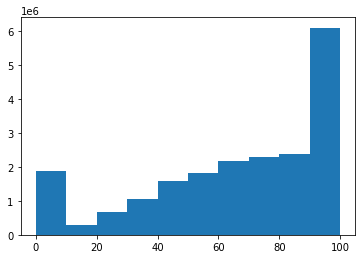

In [14]:
plt.hist("chargelevel", bins = 10, data = may);

In [15]:
may_nullcharge_company= may.chargelevel.isnull().groupby(may.companyname).sum()
print(may_nullcharge_company)

companyname
0      0
1      0
2      0
3      0
4    283
5      0
6      0
Name: chargelevel, dtype: int64


bingo - all 283 null values are in the same company, company 4.  which was a modest sized company with 687 scooters.  I'm not sure yet what that means, but something's going on there.

i wonder about the number of unique id scooter entries - those that have just one entry, is there a pattern there as well?

In [16]:
may.groupby("sumdid").filter(lambda x: len(x) == 1)

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
62,2019-05-01 00:01:41.247,36.161052,-86.781899,PoweredYEBSU,73.0,0
4272949,2019-05-09 23:03:18.997,36.134312,-86.667562,PoweredCI6VKIK2KOFMC,6.0,3
4326724,2019-05-10 02:13:10.420,36.164273,-86.769398,Powered523737,100.0,1
7520973,2019-05-16 16:18:48.717,36.141950,-86.789444,Powered3361332,0.0,4
7908151,2019-05-17 05:45:01.127,36.161862,-86.774241,PoweredN4YI2A7RXZQLY,54.0,3
9656375,2019-05-19 23:57:38.663,36.162614,-86.776840,PoweredGJYGPDVTFXRH7,78.0,3
10331574,2019-05-21 01:53:37.427,36.176371,-86.804886,PoweredCW742BQMJ3XHN,0.0,3
14738928,2019-05-26 03:17:34.450,36.153148,-86.793122,Powered8019965,100.0,4
16270541,2019-05-27 21:46:35.653,36.176051,-86.766090,Powered1PKP7,82.0,0
19207378,2019-05-30 22:07:00.887,36.147729,-86.740345,Powered6599831,71.0,4


well, there's not as many as i thought there might be - just 10, 
and company 3 has 4 of them, while company 4 has 3 of them.  No real insights here ... 

dates all over the place.  chargelevels all over.  all in different places.  i see no pattern with these single entry scooters.  and given that it's 10 out of 8300 ... not significant.

I think I'm going to need to be able to look at this data by specific dates and specific times.  I need to break down that datetime column into something more usable for me.

In [17]:
may['dates'] = pd.to_datetime(may['pubdatetime']).dt.date
may['times'] = pd.to_datetime(may['pubdatetime']).dt.time

In [18]:
may.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,dates,times
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0,2019-05-01,00:01:41.247000
1,2019-05-01 00:01:41.247,36.191252,-86.772945,PoweredXWRWC,35.0,0,2019-05-01,00:01:41.247000
2,2019-05-01 00:01:41.247,36.144752,-86.806293,PoweredMEJEH,90.0,0,2019-05-01,00:01:41.247000
3,2019-05-01 00:01:41.247,36.162056,-86.774688,Powered1A7TC,88.0,0,2019-05-01,00:01:41.247000
4,2019-05-01 00:01:41.247,36.150973,-86.783109,Powered2TYEF,98.0,0,2019-05-01,00:01:41.247000


that worked great!  let me try looking at a single day and see what i've got

In [19]:
may.loc[may["dates"]== "2019-05-01"]

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,dates,times


... that didn't work?  why not?  

In [20]:
may.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20283582 entries, 0 to 20292502
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   pubdatetime  datetime64[ns]
 1   latitude     float64       
 2   longitude    float64       
 3   sumdid       object        
 4   chargelevel  float64       
 5   companyname  int64         
 6   dates        object        
 7   times        object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 1.4+ GB


In [21]:
may_dates = may.agg({"dates": "nunique"})

In [22]:
print(may_dates)

dates    31
dtype: int64


In [23]:
may["dates"].unique()

array([datetime.date(2019, 5, 1), datetime.date(2019, 5, 2),
       datetime.date(2019, 5, 3), datetime.date(2019, 5, 4),
       datetime.date(2019, 5, 5), datetime.date(2019, 5, 6),
       datetime.date(2019, 5, 7), datetime.date(2019, 5, 8),
       datetime.date(2019, 5, 9), datetime.date(2019, 5, 10),
       datetime.date(2019, 5, 11), datetime.date(2019, 5, 12),
       datetime.date(2019, 5, 13), datetime.date(2019, 5, 14),
       datetime.date(2019, 5, 15), datetime.date(2019, 5, 16),
       datetime.date(2019, 5, 17), datetime.date(2019, 5, 18),
       datetime.date(2019, 5, 19), datetime.date(2019, 5, 20),
       datetime.date(2019, 5, 21), datetime.date(2019, 5, 22),
       datetime.date(2019, 5, 23), datetime.date(2019, 5, 24),
       datetime.date(2019, 5, 25), datetime.date(2019, 5, 26),
       datetime.date(2019, 5, 27), datetime.date(2019, 5, 28),
       datetime.date(2019, 5, 29), datetime.date(2019, 5, 30),
       datetime.date(2019, 5, 31)], dtype=object)

Ah!  there's the problem!  how do i fix THAT?  can i convert it to a string?  it's not a datetime object ... just an object.  what even is this thing?  I need to do some research on datetimes i think ... 

In [24]:
may[(may['pubdatetime'] > '2019-05-01 0:00:00') & (may['pubdatetime'] < '2019-05-01 23:59:42.000')]

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,dates,times
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0,2019-05-01,00:01:41.247000
1,2019-05-01 00:01:41.247,36.191252,-86.772945,PoweredXWRWC,35.0,0,2019-05-01,00:01:41.247000
2,2019-05-01 00:01:41.247,36.144752,-86.806293,PoweredMEJEH,90.0,0,2019-05-01,00:01:41.247000
3,2019-05-01 00:01:41.247,36.162056,-86.774688,Powered1A7TC,88.0,0,2019-05-01,00:01:41.247000
4,2019-05-01 00:01:41.247,36.150973,-86.783109,Powered2TYEF,98.0,0,2019-05-01,00:01:41.247000
...,...,...,...,...,...,...,...,...
568925,2019-05-01 23:59:40.990,36.154100,-86.784660,Powered049255,78.0,1,2019-05-01,23:59:40.990000
568926,2019-05-01 23:59:41.053,36.160539,-86.778321,Powered594213,81.0,1,2019-05-01,23:59:41.053000
568927,2019-05-01 23:59:41.610,36.133136,-86.818130,Powered341619,46.0,1,2019-05-01,23:59:41.610000
568928,2019-05-01 23:59:41.667,36.160070,-86.776666,Powered542423,38.0,1,2019-05-01,23:59:41.667000


okay - well, that did SOMETHING, but since we're thinking we need to focus specifically on commuter times ... i think i still need to get those dates and times columns to work ... 

so ... datetime objects are a thing.  they exist for a reason.  seems pretty basic.  there's got to be a way to make them useable.  i don't know that converting them to a string is the right path.  i should be able to make use of them as they are.  i just don't understand what they are to be able to do that ... yet

In [30]:
may.loc[may["dates"]== datetime.date(2019, 5, 1)]

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,dates,times
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0,2019-05-01,00:01:41.247000
1,2019-05-01 00:01:41.247,36.191252,-86.772945,PoweredXWRWC,35.0,0,2019-05-01,00:01:41.247000
2,2019-05-01 00:01:41.247,36.144752,-86.806293,PoweredMEJEH,90.0,0,2019-05-01,00:01:41.247000
3,2019-05-01 00:01:41.247,36.162056,-86.774688,Powered1A7TC,88.0,0,2019-05-01,00:01:41.247000
4,2019-05-01 00:01:41.247,36.150973,-86.783109,Powered2TYEF,98.0,0,2019-05-01,00:01:41.247000
...,...,...,...,...,...,...,...,...
569066,2019-05-01 23:59:59.643,36.163914,-86.769393,Powered875414,86.0,1,2019-05-01,23:59:59.643000
569067,2019-05-01 23:59:59.833,36.163933,-86.769403,Powered486289,89.0,1,2019-05-01,23:59:59.833000
569068,2019-05-01 23:59:59.947,36.154740,-86.784968,Powered583191,57.0,1,2019-05-01,23:59:59.947000
569069,2019-05-01 23:59:59.983,36.122224,-86.779943,Powered786553,84.0,1,2019-05-01,23:59:59.983000


In [31]:
may.loc[may["pubdatetime"]==datetime.date("2019,05,01)]

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,dates,times


okay!  that worked!  and it worked on the dates column, but not the pubdatetime column ... i'm guessing because the date is still attached to a time in that column, making it unsearchable that way.

does this translate to the times column?  can i look for a specific time across all the rows?

In [34]:
may.loc[may["times"]==datetime.time("00:01:41.247000")]
#note - code here does not work.  need to convert it to something else ... 

TypeError: an integer is required (got type str)

In [35]:
may['hours'] = pd.to_datetime(may['pubdatetime']).dt.hour

In [36]:
may.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,dates,times,hours
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0,2019-05-01,00:01:41.247000,0
1,2019-05-01 00:01:41.247,36.191252,-86.772945,PoweredXWRWC,35.0,0,2019-05-01,00:01:41.247000,0
2,2019-05-01 00:01:41.247,36.144752,-86.806293,PoweredMEJEH,90.0,0,2019-05-01,00:01:41.247000,0
3,2019-05-01 00:01:41.247,36.162056,-86.774688,Powered1A7TC,88.0,0,2019-05-01,00:01:41.247000,0
4,2019-05-01 00:01:41.247,36.150973,-86.783109,Powered2TYEF,98.0,0,2019-05-01,00:01:41.247000,0


In [37]:
may.tail()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,dates,times,hours
20292498,2019-05-31 23:59:42,36.1639,-86.7823,Poweredbb60ef04-c719-597f-805f-20978964fd8c,49.0,5,2019-05-31,23:59:42,23
20292499,2019-05-31 23:59:42,36.1606,-86.7768,Powered9f5743ed-7f81-539b-9e37-6503d54445d3,68.0,5,2019-05-31,23:59:42,23
20292500,2019-05-31 23:59:42,36.1606,-86.7769,Powered5744d1db-3bbe-55e5-9a23-a93828ba54fc,53.0,5,2019-05-31,23:59:42,23
20292501,2019-05-31 23:59:42,36.1624,-86.7745,Poweredad1d6d3b-162a-5bec-bffd-cac4ac8dee1c,42.0,5,2019-05-31,23:59:42,23
20292502,2019-05-31 23:59:42,36.1519,-86.7985,Powered8505008e-97c9-5003-8975-2ea6b2634fa0,76.0,5,2019-05-31,23:59:42,23


In [42]:
may.loc[may["hours"]==(7)]

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,dates,times,hours
154603,2019-05-01 07:00:03.897,36.121480,-86.770450,Powered447,66.0,2,2019-05-01,07:00:03.897000,7
154604,2019-05-01 07:00:03.897,36.121393,-86.770228,Powered695,96.0,2,2019-05-01,07:00:03.897000,7
154605,2019-05-01 07:00:03.897,36.144292,-86.811540,Powered341,90.0,2,2019-05-01,07:00:03.897000,7
154606,2019-05-01 07:00:03.897,36.121616,-86.770332,Powered351,61.0,2,2019-05-01,07:00:03.897000,7
154607,2019-05-01 07:00:03.897,36.121575,-86.770093,Powered759,41.0,2,2019-05-01,07:00:03.897000,7
...,...,...,...,...,...,...,...,...,...
19605697,2019-05-31 07:59:42.000,36.153000,-86.795300,Powerede980446c-be26-54ef-aa91-1b723da8855d,52.0,5,2019-05-31,07:59:42,7
19605698,2019-05-31 07:59:42.000,36.119700,-86.753000,Powered1bf0d1c6-a03f-5257-a6a2-f077adc42537,0.0,5,2019-05-31,07:59:42,7
19605699,2019-05-31 07:59:42.000,36.174200,-86.790500,Poweredde5a4ca9-6e8a-5b3f-b8ec-3b97b36a54f2,85.0,5,2019-05-31,07:59:42,7
19605700,2019-05-31 07:59:42.000,36.120100,-86.753400,Poweredfe2bc4e4-5fd7-56c1-8e30-e752cf8316d7,0.0,5,2019-05-31,07:59:42,7


In [48]:
may.loc[(may['hours'] > 6) & (may['hours'] < 10)]

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,dates,times,hours
154603,2019-05-01 07:00:03.897,36.121480,-86.770450,Powered447,66.0,2,2019-05-01,07:00:03.897000,7
154604,2019-05-01 07:00:03.897,36.121393,-86.770228,Powered695,96.0,2,2019-05-01,07:00:03.897000,7
154605,2019-05-01 07:00:03.897,36.144292,-86.811540,Powered341,90.0,2,2019-05-01,07:00:03.897000,7
154606,2019-05-01 07:00:03.897,36.121616,-86.770332,Powered351,61.0,2,2019-05-01,07:00:03.897000,7
154607,2019-05-01 07:00:03.897,36.121575,-86.770093,Powered759,41.0,2,2019-05-01,07:00:03.897000,7
...,...,...,...,...,...,...,...,...,...
19670960,2019-05-31 09:59:46.510,36.177697,-86.777695,PoweredZYASW,83.0,0,2019-05-31,09:59:46.510000,9
19670961,2019-05-31 09:59:46.510,36.154415,-86.779239,Powered5ZVXC,100.0,0,2019-05-31,09:59:46.510000,9
19670962,2019-05-31 09:59:46.510,36.180934,-86.749486,Powered72PTV,96.0,0,2019-05-31,09:59:46.510000,9
19670963,2019-05-31 09:59:46.510,36.171303,-86.752101,PoweredYFN3B,100.0,0,2019-05-31,09:59:46.510000,9


Okay!  so, i have a dates column that i can filter on to find all data for a specific date - useful!

and i have an hours column that i can filter on for a specific hour-wide window, or a range of hours - also useful!  

#NOW TO LOOK AT THE DATA OF THE TRIPS DF

In [50]:
maytrip.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,2019-05-01 00:00:55.423000,Bird,BRD2134,Powered9EAJL,3.0000,958.00528,2019-05-01 00:00:00,00:00:20.460000,2019-05-01 00:00:00,00:02:52.346666,36.15710,-86.80360,36.15660,-86.80670,"[[36.157235,-86.803612],[36.157235,-86.80362],...",2019-05-02 05:30:23.780000
1,2019-05-01 00:03:33.147000,Lyft,LFT5,Powered296631,1.7156,1371.39112,2019-05-01 00:00:00,00:01:50.090000,2019-05-01 00:00:00,00:03:33.026666,36.15797,-86.77896,36.16054,-86.77689,"[[36.15797,-86.77896],[36.15795,-86.77873],[36...",2019-05-02 07:20:32.757000
2,2019-05-01 00:05:55.570000,Bird,BRD2168,Powered7S2UU,3.0000,2296.58800,2019-05-01 00:00:00,00:03:47.363333,2019-05-01 00:00:00,00:07:13.596666,36.15470,-86.78180,36.15650,-86.78680,"[[36.155068,-86.782124],[36.156597,-86.78675]]",2019-05-02 05:30:24.530000
3,2019-05-01 00:05:55.570000,Bird,BRD2166,PoweredZIIVX,3.0000,1200.78744,2019-05-01 00:00:00,00:04:21.386666,2019-05-01 00:00:00,00:06:59.176666,36.14940,-86.77950,36.15310,-86.77960,"[[36.149741,-86.779344],[36.149741,-86.779327]...",2019-05-02 05:30:24.237000
4,2019-05-01 00:05:55.570000,Bird,BRD2165,PoweredJ7MB3,2.0000,351.04988,2019-05-01 00:00:00,00:04:27.796666,2019-05-01 00:00:00,00:06:23.150000,36.17780,-86.78660,36.17740,-86.78760,"[[36.177699,-86.786477],[36.177711,-86.786469]...",2019-05-02 05:30:24.207000


In [51]:
maytrip.tail()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
224964,2019-06-01 23:50:42.373000,Lime,LIM5241,PoweredJ6OI7QJIK4NO2,62.316667,0.00000,2019-05-31 00:00:00,23:16:25,2019-06-01 00:00:00,00:18:44,36.131741,-86.779007,36.155466,-86.779859,"[[36.1317,-86.77903]]",2019-06-02 08:04:56.923000
224965,2019-06-01 23:50:42.397000,Lime,LIM5285,PoweredQDVYGLDL6ZQDU,22.383333,9337.15680,2019-05-31 00:00:00,23:59:45,2019-06-01 00:00:00,00:22:08,36.126207,-86.789366,36.149205,-86.786162,"[[36.12621,-86.78937],[36.125840000000004,-86....",2019-06-02 08:04:58.683000
224966,2019-06-01 23:50:42.480000,Lime,LIM5413,PoweredH5HCTZB5WVABT,40.200000,20951.18880,2019-05-31 00:00:00,23:31:19,2019-06-01 00:00:00,00:11:31,36.126730,-86.778251,36.143138,-86.793144,"[[36.12673,-86.77825],[36.12664,-86.77731],[36...",2019-06-02 08:05:02.987000
224967,2019-06-01 23:50:42.480000,Lime,LIM5412,PoweredFXC5KHVLI3T7C,41.033333,21049.61280,2019-05-31 00:00:00,23:30:26,2019-06-01 00:00:00,00:11:28,36.126730,-86.778195,36.143140,-86.793125,"[[36.12673,-86.77819],[36.126740000000005,-86....",2019-06-02 08:05:02.957000
224968,2019-06-13 05:17:41.630000,SPIN,SPI146,Powered5750098,36206.000000,21551.83796,2019-05-19 00:00:00,01:49:22,2019-06-13 00:00:00,05:14:40,36.148668,-86.813511,36.147776,-86.740437,"[[36.147775779365219,-86.740436729892863],[36....",2019-06-14 09:36:56.957000


In [52]:
maytrip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224969 entries, 0 to 224968
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   pubTimeStamp    224969 non-null  object 
 1   companyName     224969 non-null  object 
 2   tripRecordNum   224969 non-null  object 
 3   sumdID          224969 non-null  object 
 4   tripDuration    224969 non-null  float64
 5   tripDistance    224969 non-null  float64
 6   startDate       224969 non-null  object 
 7   startTime       224969 non-null  object 
 8   endDate         224969 non-null  object 
 9   endTime         224969 non-null  object 
 10  startLatitude   224969 non-null  float64
 11  startLongitude  224969 non-null  float64
 12  endLatitude     224969 non-null  float64
 13  endLongitude    224969 non-null  float64
 14  tripRoute       224969 non-null  object 
 15  create_dt       224969 non-null  object 
dtypes: float64(6), object(10)
memory usage: 27.5+ MB


Hmmm ... i'm not sure just now what to do with this.  But, i think it should be possible to merge it with the other one?  which one would be left though?  and do i really need to do that?

if i do ... it would probably be useful to me to convert the company names to the same numbers to start with.  That way there's any hope of the two dfs talking with one another ... 